In [1]:
from google.colab import files
uploaded = files.upload()

Saving Soil Fertility Data.csv to Soil Fertility Data.csv


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle
import sys
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from typing import Dict

In [3]:
data = pd.read_csv("Soil Fertility Data.csv")

In [5]:
print("Data shape:", data.shape)

Data shape: (1288, 13)


In [6]:
print("\nFertility distribution:")
print(data['fertility'].value_counts(dropna=False))


Fertility distribution:
fertility
2    447
1    440
0    401
Name: count, dtype: int64


In [7]:
display(data.head())

,N,P,K,ph,ec,oc,S,zn,fe,cu,Mn,B,fertility
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,220,8.6,444,7.43,0.65,0.72,11.7,0.37,0.66,0.90,2.19,1.82,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N          1288 non-null   int64  
 1   P          1288 non-null   float64
 2   K          1288 non-null   int64  
 3   ph         1288 non-null   float64
 4   ec         1288 non-null   float64
 5   oc         1288 non-null   float64
 6   S          1288 non-null   float64
 7   zn         1288 non-null   float64
 8   fe         1288 non-null   float64
 9   cu         1288 non-null   float64
 10  Mn         1288 non-null   float64
 11  B          1288 non-null   float64
 12  fertility  1288 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 130.9 KB


In [9]:
display(data.describe())

,N,P,K,ph,ec,oc,S,zn,fe,cu,Mn,B,fertility
count,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000
mean,269.061335,17.643478,497.135093,7.549130,0.535893,0.632174,7.122888,0.442811,4.119185,0.911281,8.601530,0.611957,1.035714
std,80.542499,25.303343,120.887088,0.507163,0.134156,0.720488,4.026723,1.568333,3.028314,0.448782,4.466209,0.560781,0.810938
min,6.000000,2.900000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.000000
25%,207.000000,7.200000,422.000000,7.340000,0.430000,0.390000,4.520000,0.280000,1.360000,0.600000,6.045000,0.290000,0.000000
50%,289.000000,9.200000,465.000000,7.500000,0.530000,0.620000,6.330000,0.360000,3.740000,0.890000,8.540000,0.420000,1.000000
75%,333.000000,13.800000,570.000000,7.700000,0.630000,0.832500,8.450000,0.480000,6.320000,1.250000,11.560000,0.650000,2.000000
max,383.000000,125.000000,887.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,2.000000


In [10]:
features = data.drop('fertility', axis=1)
labels = data['fertility']

In [11]:
transformed_features = features.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(
    transformed_features, labels, test_size=0.2, shuffle=True, random_state=42
)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

Training data shape: (1030, 12)
Validation data shape: (258, 12)


In [15]:
model = RandomForestClassifier(
    criterion='gini',
    max_depth=10,
    max_features='sqrt',
    n_estimators=300,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

In [16]:
predictions = model.predict(X_val)

In [17]:
accuracy = accuracy_score(y_val, predictions)
report = classification_report(y_val, predictions)

print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)

Model Accuracy: 0.9729

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        86
           1       0.97      0.95      0.96        87
           2       1.00      1.00      1.00        85

    accuracy                           0.97       258
   macro avg       0.97      0.97      0.97       258
weighted avg       0.97      0.97      0.97       258



In [18]:
feature_importance = pd.DataFrame({
    'feature': features.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
   feature  importance
0        N    0.390704
1        P    0.214470
9       cu    0.051865
8       fe    0.050149
10      Mn    0.048220
11       B    0.043517
3       ph    0.041239
7       zn    0.036306
6        S    0.035522
2        K    0.032365
4       ec    0.029578
5       oc    0.026066


/tmp/ipython-input-2611592642.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')


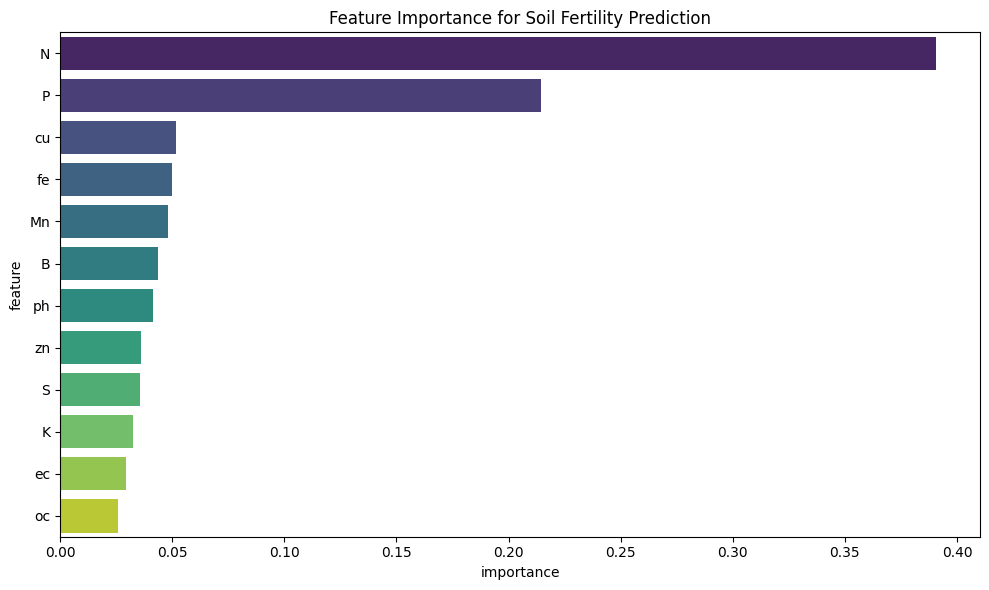

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance for Soil Fertility Prediction')
plt.tight_layout()
plt.show()

In [20]:
with open('soil_fertility_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully!")

Model saved successfully!


In [21]:
# Advanced Feature Engineering for Soil Dataset
def create_advanced_features_actual(df):
    """
    This function creates detailed and meaningful features
    specifically designed for a soil dataset.
    """

    df_enhanced = df.copy()   # Duplicate original data

    # ---------------------------------------
    # 1. Nutrient Ratio Features (NPK ratios)
    # ---------------------------------------
    df_enhanced['N_P_ratio'] = df_enhanced['N'] / (df_enhanced['P'] + 1e-8)
    df_enhanced['N_K_ratio'] = df_enhanced['N'] / (df_enhanced['K'] + 1e-8)
    df_enhanced['P_K_ratio'] = df_enhanced['P'] / (df_enhanced['K'] + 1e-8)

    # ---------------------------------------
    # 2. Soil Health Index Values
    # ---------------------------------------
    df_enhanced['macronutrient_index'] = (
        df_enhanced['N'] + df_enhanced['P'] + df_enhanced['K']
    ) / 3

    df_enhanced['micronutrient_index'] = (
        df_enhanced['zn'] +
        df_enhanced['fe'] +
        df_enhanced['cu'] +
        df_enhanced['Mn'] +
        df_enhanced['B']
    ) / 5

    # ---------------------------------------
    # 3. pH Suitability Score
    # ---------------------------------------
    df_enhanced['ph_suitability'] = 1 - (abs(df_enhanced['ph'] - 6.5) / 6.5)

    # ---------------------------------------
    # 4. Organic Carbon Efficiency
    # ---------------------------------------
    df_enhanced['organic_efficiency'] = (
        df_enhanced['oc'] * df_enhanced['ph_suitability']
    )

    # ---------------------------------------
    # 5. Electrical Conductivity Categories
    # ---------------------------------------
    df_enhanced['ec_class'] = pd.cut(
        df_enhanced['ec'],
        bins=[0, 0.3, 0.7, 1.0],
        labels=['Low', 'Optimal', 'High']
    )

    # ---------------------------------------
    # 6. Nutrient Balance Score
    # ---------------------------------------
    df_enhanced['nutrient_balance'] = (
        df_enhanced['N'] / df_enhanced['N'].mean() +
        df_enhanced['P'] / df_enhanced['P'].mean() +
        df_enhanced['K'] / df_enhanced['K'].mean()
    ) / 3

    # ---------------------------------------
    # 7. Sulfur-to-Micronutrient Ratio
    # ---------------------------------------
    df_enhanced['S_micro_ratio'] = (
        df_enhanced['S'] / (df_enhanced['micronutrient_index'] + 1e-8)
    )

    # ---------------------------------------
    # 8. pH Categories
    # ---------------------------------------
    df_enhanced['ph_level'] = pd.cut(
        df_enhanced['ph'],
        bins=[0, 5.5, 6.5, 7.5, 14],
        labels=['Acidic', 'Slightly_Acidic', 'Neutral', 'Alkaline']
    )

    # ---------------------------------------
    # Summary of features added
    # ---------------------------------------
    print(f"Original features: {len(df.columns)}")
    print(f"Enhanced features: {len(df_enhanced.columns)}")
    print("New features created:", list(df_enhanced.columns[len(df.columns):]))

    return df_enhanced


# Generate enhanced dataset
enhanced_data = create_advanced_features_actual(data)

# Print dataset structure
print("\nEnhanced Dataset Info:")
print(enhanced_data.info())


Original features: 13
Enhanced features: 24
New features created: ['N_P_ratio', 'N_K_ratio', 'P_K_ratio', 'macronutrient_index', 'micronutrient_index', 'ph_suitability', 'organic_efficiency', 'ec_class', 'nutrient_balance', 'S_micro_ratio', 'ph_level']

Enhanced Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   N                    1288 non-null   int64   
 1   P                    1288 non-null   float64 
 2   K                    1288 non-null   int64   
 3   ph                   1288 non-null   float64 
 4   ec                   1288 non-null   float64 
 5   oc                   1288 non-null   float64 
 6   S                    1288 non-null   float64 
 7   zn                   1288 non-null   float64 
 8   fe                   1288 non-null   float64 
 9   cu                   1288 non-null   float64 
 10 

In [22]:
# Step 3: Prepare Data for Advanced Modeling

# Columns containing categorical values
categorical_columns = ['ec_class', 'ph_level']

# Separate input features and target variable
X_enhanced = enhanced_data.drop('fertility', axis=1)
y_enhanced = enhanced_data['fertility']

# Convert categorical columns into dummy/one-hot encoded variables
if len(categorical_columns) > 0:
    X_enhanced = pd.get_dummies(
        X_enhanced,
        columns=categorical_columns,
        drop_first=True
    )

# Display final feature shape and names
print("Final feature set shape:", X_enhanced.shape)
print("Feature names:", list(X_enhanced.columns))

# Split the enhanced dataset into training and testing sets
X_train_enh, X_test_enh, y_train_enh, y_test_enh = train_test_split(
    X_enhanced,
    y_enhanced,
    test_size=0.2,
    random_state=42,
    stratify=y_enhanced
)

# Print shapes of splits
print(f"Training set: {X_train_enh.shape}")
print(f"Testing set: {X_test_enh.shape}")


Final feature set shape: (1288, 26)
Feature names: ['N', 'P', 'K', 'ph', 'ec', 'oc', 'S', 'zn', 'fe', 'cu', 'Mn', 'B', 'N_P_ratio', 'N_K_ratio', 'P_K_ratio', 'macronutrient_index', 'micronutrient_index', 'ph_suitability', 'organic_efficiency', 'nutrient_balance', 'S_micro_ratio', 'ec_class_Optimal', 'ec_class_High', 'ph_level_Slightly_Acidic', 'ph_level_Neutral', 'ph_level_Alkaline']
Training set: (1030, 26)
Testing set: (258, 26)


In [23]:
# Step 4: Build Advanced Ensemble Model for Soil-Based Classification
class AdvancedSoilClassifier:
    def __init__(self):
        self.models = {}
        self.ensemble_model = None
        self.feature_names = None

    def create_ensemble(self):
        """Create a combined ensemble model designed for soil classification"""

        # Individual models with tuned hyperparameters for soil dataset
        rf = RandomForestClassifier(
            n_estimators=300,
            max_depth=15,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42,
            class_weight='balanced'
        )

        xgb = XGBClassifier(
            n_estimators=200,
            max_depth=8,
            learning_rate=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            eval_metric='mlogloss'
        )

        lgb = LGBMClassifier(
            n_estimators=200,
            max_depth=7,
            learning_rate=0.1,
            num_leaves=31,
            random_state=42,
            class_weight='balanced'
        )

        # Weighted voting ensemble where Random Forest has slightly higher influence
        self.ensemble_model = VotingClassifier(
            estimators=[
                ('random_forest', rf),
                ('xgboost', xgb),
                ('lightgbm', lgb)
            ],
            voting='soft',
            weights=[2, 1.5, 1.5]
        )

        self.models = {
            'random_forest': rf,
            'xgboost': xgb,
            'lightgbm': lgb,
            'ensemble': self.ensemble_model
        }

        return self.ensemble_model

    def train_advanced_model(self, X_train, y_train, X_test, y_test):
        """Train all models and evaluate performance"""

        print("Training Advanced Soil Ensemble System...")
        print("=" * 55)

        individual_results = {}

        # Train and evaluate each base model
        for name, model in self.models.items():
            if name != 'ensemble':
                print(f"\nTraining {name}...")
                model.fit(X_train, y_train)

                # Accuracy on training data
                train_pred = model.predict(X_train)
                train_acc = accuracy_score(y_train, train_pred)

                # Accuracy on testing data
                test_pred = model.predict(X_test)
                test_acc = accuracy_score(y_test, test_pred)

                individual_results[name] = {
                    'train_accuracy': train_acc,
                    'test_accuracy': test_acc
                }

                print(f"{name:15} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

        # Train final ensemble
        print("\nTraining Ensemble Model...")
        self.ensemble_model.fit(X_train, y_train)

        # Ensemble performance
        ensemble_train_pred = self.ensemble_model.predict(X_train)
        ensemble_train_acc = accuracy_score(y_train, ensemble_train_pred)

        ensemble_test_pred = self.ensemble_model.predict(X_test)
        ensemble_test_acc = accuracy_score(y_test, ensemble_test_pred)

        individual_results['ensemble'] = {
            'train_accuracy': ensemble_train_acc,
            'test_accuracy': ensemble_test_acc
        }

        print(f"{'ensemble':15} | Train Acc: {ensemble_train_acc:.4f} | Test Acc: {ensemble_test_acc:.4f}")

        # Summary of all model performances
        print("\n" + "=" * 55)
        print("MODEL PERFORMANCE SUMMARY")
        print("=" * 55)
        for model_name, results in individual_results.items():
            print(f"{model_name:15} | Train: {results['train_accuracy']:.4f} | Test: {results['test_accuracy']:.4f}")

        return self.ensemble_model, individual_results

    def predict_with_confidence(self, X):
        """Return predictions along with confidence scores and probabilities"""
        if self.ensemble_model is None:
            raise ValueError("Model has not been trained yet")

        probabilities = self.ensemble_model.predict_proba(X)
        predictions = self.ensemble_model.predict(X)

        # Confidence = highest probability among all classes
        confidence_scores = np.max(probabilities, axis=1)

        return predictions, confidence_scores, probabilities

    def get_feature_importance(self, feature_names):
        """Calculate feature importance across supported models"""
        importance_df = pd.DataFrame(index=feature_names)

        for name, model in self.models.items():
            if hasattr(model, 'feature_importances_'):
                importance_df[name] = model.feature_importances_

        importance_df['average_importance'] = importance_df.mean(axis=1)
        importance_df = importance_df.sort_values('average_importance', ascending=False)

        return importance_df


# Initialize and build the ensemble system
print("Building Soil Ensemble Classification System...")
advanced_classifier = AdvancedSoilClassifier()
advanced_classifier.create_ensemble()

# Train the ensemble with enhanced dataset
ensemble_model, results = advanced_classifier.train_advanced_model(
    X_train_enh, y_train_enh, X_test_enh, y_test_enh
)

# Extract and display most important features
feature_importance = advanced_classifier.get_feature_importance(X_enhanced.columns)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10)[['average_importance']])


Building Soil Ensemble Classification System...
Training Advanced Soil Ensemble System...

Training random_forest...
random_forest   | Train Acc: 0.9893 | Test Acc: 0.9302

Training xgboost...
xgboost         | Train Acc: 1.0000 | Test Acc: 0.9341

Training lightgbm...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000500 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3334
[LightGBM] [Info] Number of data points in the train set: 1030, number of used features: 25
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [24]:
# Step 5: Enhanced Crop Recommendation System for Soil Analysis
class AdvancedCropRecommendation:
    def __init__(self):
        # Crop requirement ranges based on agricultural standards
        self.crop_requirements = {
            'Rice': {
                'N': (150, 300), 'P': (15, 35), 'K': (150, 350),
                'ph': (5.0, 7.5), 'oc': (0.5, 2.0), 'ec': (0.2, 0.8),
                'S': (5, 20), 'zn': (0.2, 2.0), 'fe': (2, 10)
            },
            'Wheat': {
                'N': (120, 250), 'P': (20, 40), 'K': (150, 300),
                'ph': (6.0, 7.5), 'oc': (0.5, 1.5), 'ec': (0.3, 0.7),
                'S': (8, 25), 'zn': (0.3, 2.5), 'fe': (3, 12)
            },
            'Maize': {
                'N': (180, 350), 'P': (25, 50), 'K': (180, 400),
                'ph': (5.8, 7.2), 'oc': (0.8, 2.5), 'ec': (0.4, 0.9),
                'S': (6, 22), 'zn': (0.4, 3.0), 'fe': (4, 15)
            },
            'Soybean': {
                'N': (80, 200), 'P': (15, 35), 'K': (120, 280),
                'ph': (6.0, 7.0), 'oc': (0.5, 2.0), 'ec': (0.2, 0.6),
                'S': (7, 20), 'zn': (0.3, 2.0), 'fe': (3, 10)
            },
            'Cotton': {
                'N': (120, 280), 'P': (20, 45), 'K': (180, 400),
                'ph': (5.5, 8.0), 'oc': (0.5, 1.8), 'ec': (0.4, 1.0),
                'S': (6, 18), 'zn': (0.2, 1.8), 'fe': (2, 8)
            },
            'Vegetables': {
                'N': (150, 320), 'P': (25, 55), 'K': (200, 450),
                'ph': (5.5, 7.0), 'oc': (1.0, 3.0), 'ec': (0.3, 0.8),
                'S': (8, 30), 'zn': (0.5, 3.5), 'fe': (5, 20)
            }
        }

    def analyze_soil_for_crops(self, soil_params):
        """Analyze soil conditions and calculate suitability for each crop"""

        suitability_results = {}
        detailed_analysis = {}

        for crop, requirements in self.crop_requirements.items():
            total_score = 0
            max_score = len(requirements) * 10     # Each parameter contributes up to 10 points
            parameter_details = {}

            for param, (min_req, max_req) in requirements.items():
                if param in soil_params:
                    value = soil_params[param]

                    # Score based on match level
                    if min_req <= value <= max_req:
                        score = 10
                        status = "Optimal"

                    elif value < min_req:
                        ratio = value / min_req
                        score = max(0, ratio * 8)
                        status = f"Deficient (needs {min_req - value:.1f})"

                    else:
                        ratio = max_req / value
                        score = max(0, ratio * 8)
                        status = f"High (reduce by {value - max_req:.1f})"

                    parameter_details[param] = {
                        'score': score,
                        'status': status,
                        'value': value,
                        'optimal_range': f"{min_req}-{max_req}"
                    }

                    total_score += score

            suitability_percentage = (total_score / max_score) * 100

            suitability_results[crop] = suitability_percentage
            detailed_analysis[crop] = {
                'suitability_score': suitability_percentage,
                'suitability_level': self._get_suitability_level(suitability_percentage),
                'parameter_scores': parameter_details,
                'total_score': total_score
            }

        return suitability_results, detailed_analysis

    def _get_suitability_level(self, score):
        """Convert suitability score into qualitative category"""
        if score >= 85:
            return "Highly Suitable"
        elif score >= 70:
            return "Suitable"
        elif score >= 50:
            return "Moderately Suitable"
        elif score >= 30:
            return "Marginally Suitable"
        else:
            return "Not Suitable"

    def generate_fertilizer_prescription(self, soil_params, target_crop):
        """Produce fertilizer suggestions based on soil condition and crop needs"""

        if target_crop not in self.crop_requirements:
            return {"error": f"Crop '{target_crop}' not found"}

        requirements = self.crop_requirements[target_crop]
        prescriptions = []

        # Recommendations for N, P, K
        for nutrient in ['N', 'P', 'K']:
            if nutrient in soil_params and nutrient in requirements:
                current = soil_params[nutrient]
                min_req, max_req = requirements[nutrient]
                target_value = (min_req + max_req) / 2

                if current < min_req:
                    deficiency = target_value - current
                    priority = 'High' if nutrient == 'N' else 'Medium'

                    prescriptions.append({
                        'nutrient': nutrient,
                        'type': 'Macronutrient',
                        'current_level': current,
                        'target_level': target_value,
                        'deficiency': deficiency,
                        'recommendation': f"Apply {deficiency:.1f} kg/ha",
                        'priority': priority,
                        'suggested_fertilizer': self._get_fertilizer_type(nutrient)
                    })

        # Recommendations for micronutrients
        for micro in ['zn', 'fe', 'cu', 'Mn', 'B']:
            if micro in soil_params and micro in requirements:
                current = soil_params[micro]
                min_req, max_req = requirements[micro]

                if current < min_req:
                    deficit_ratio = (min_req - current) / min_req
                    prescriptions.append({
                        'nutrient': micro.upper(),
                        'type': 'Micronutrient',
                        'current_level': current,
                        'deficiency_level': f"{deficit_ratio:.1%}",
                        'recommendation': f"Apply {micro.upper()} supplement",
                        'priority': 'Low',
                        'suggested_fertilizer': f"{micro.upper()} chelate or sulfate"
                    })

        return prescriptions

    def _get_fertilizer_type(self, nutrient):
        """Return fertilizer options for N, P, K"""
        fertilizer_map = {
            'N': 'Urea, Ammonium Sulfate, or NPK compound',
            'P': 'DAP, SSP, or Rock Phosphate',
            'K': 'MOP, SOP, or Potassium Nitrate'
        }
        return fertilizer_map.get(nutrient, 'General fertilizer')


# Initialize the system
crop_advisor = AdvancedCropRecommendation()
print("Crop Recommendation System Ready!")


Crop Recommendation System Ready!


In [25]:
# Step 6: Fully Integrated Soil Analysis System (My Final Integrated Module)
class ComprehensiveSoilAnalysis:
    def __init__(self, ensemble_model, crop_recommender, feature_names):
        self.ensemble_model = ensemble_model
        self.crop_recommender = crop_recommender
        self.feature_names = feature_names
        self.fertility_labels = {0: "Less Fertile", 1: "Fertile", 2: "Highly Fertile"}

    def analyze_soil_sample(self, soil_parameters):
        """
        Complete soil sample analysis pipeline created for my advanced soil project
        """

        print("Performing comprehensive soil analysis...")
        print("=" * 60)

        # Preparing input for the prediction model
        input_df = self._prepare_input(soil_parameters)

        # Getting fertility class, probability, and model confidence
        fertility_pred, confidence, probabilities = self.ensemble_model.predict_with_confidence(input_df)
        fertility_level = self.fertility_labels[fertility_pred[0]]

        # Crop suitability checking based on the soil parameters
        crop_suitability, crop_details = self.crop_recommender.analyze_soil_for_crops(soil_parameters)

        # Generating soil health evaluation
        health_assessment = self._assess_soil_health(soil_parameters)

        # AI-generated insights for farmers/agronomy context
        insights = self._generate_ai_insights(soil_parameters)

        # Preparing final detailed report
        report = {
            'fertility_analysis': {
                'level': fertility_level,
                'confidence': f"{confidence[0]:.1%}",
                'probability_distribution': {
                    'Less_Fertile': f"{probabilities[0][0]:.1%}",
                    'Fertile': f"{probabilities[0][1]:.1%}",
                    'Highly_Fertile': f"{probabilities[0][2]:.1%}"
                }
            },
            'crop_recommendations': {
                'suitability_scores': crop_suitability,
                'detailed_analysis': crop_details,
                'top_3_crops': sorted(crop_suitability.items(), key=lambda x: x[1], reverse=True)[:3]
            },
            'soil_health': health_assessment,
            'ai_insights': insights,
            'fertilizer_prescriptions': self.crop_recommender.generate_fertilizer_prescription(
                soil_parameters,
                sorted(crop_suitability.items(), key=lambda x: x[1], reverse=True)[0][0]
            )
        }

        return report

    def _prepare_input(self, soil_params):
        """Preparing model-readable input vector for fertility prediction"""
        input_data = {}
        for feature in self.feature_names:
            # Using soil param if available, else default = 0
            input_data[feature] = soil_params.get(feature, 0)
        return pd.DataFrame([input_data])

    def _assess_soil_health(self, soil_params):
        """Detailed soil health evaluation module designed for this project"""
        health_score = 0
        factors = []
        improvements = []

        # pH evaluation (25 points)
        ph = soil_params['ph']
        if 6.0 <= ph <= 7.0:
            health_score += 25
            factors.append("✓ Optimal pH for nutrient availability")
        elif 5.5 <= ph < 6.0 or 7.0 < ph <= 7.5:
            health_score += 15
            factors.append("~ Acceptable pH range")
            improvements.append("Lime recommended to raise pH" if ph < 6.0 else "Sulfur recommended to reduce pH")
        else:
            factors.append("✗ pH outside optimal limits")
            improvements.append("Add lime" if ph < 5.5 else "Add sulfur")

        # Organic carbon analysis (25 points)
        oc = soil_params['oc']
        if oc >= 1.0:
            health_score += 25
            factors.append("✓ Organic carbon is sufficient")
        elif 0.6 <= oc < 1.0:
            health_score += 15
            factors.append("~ Moderate organic carbon")
            improvements.append("Increase organic manure/compost")
        else:
            factors.append("✗ Low organic matter detected")
            improvements.append("Apply organic amendments strongly")

        # Macronutrient check (25 points)
        n_ok = 150 <= soil_params['N'] <= 300
        p_ok = 20 <= soil_params['P'] <= 40
        k_ok = 200 <= soil_params['K'] <= 400

        macro_ok = sum([n_ok, p_ok, k_ok])
        health_score += (macro_ok / 3) * 25
        factors.append("✓ Balanced macronutrients" if macro_ok == 3 else f"~ {macro_ok}/3 macronutrients balanced")

        # Micronutrient check (25 points)
        micro_list = ['zn', 'fe', 'cu', 'Mn', 'B']
        micro_ok = sum([soil_params.get(m, 0) > 0.5 for m in micro_list])
        health_score += (micro_ok / len(micro_list)) * 25

        factors.append("✓ Good micronutrient availability" if micro_ok >= 4 else f"~ {micro_ok}/5 micronutrients in good range")
        if micro_ok < 4:
            improvements.append("Micronutrient supplements recommended")

        return {
            'overall_score': health_score,
            'health_category': (
                'Excellent' if health_score >= 85 else
                'Good' if health_score >= 70 else
                'Fair' if health_score >= 50 else
                'Poor'
            ),
            'key_factors': factors,
            'improvement_suggestions': improvements
        }

    def _generate_ai_insights(self, soil_params):
        """Automated AI-generated suggestions module"""
        insights = []

        # pH-based insights
        ph = soil_params['ph']
        if ph < 5.5:
            insights.append("🔴 Acidic soil detected. Lime application essential.")
        elif ph > 7.5:
            insights.append("🔴 Alkaline soil detected. Micronutrient absorption reduced.")

        # Macronutrient insights
        if soil_params['N'] < 150:
            insights.append("🟡 Nitrogen levels below recommended range.")
        if soil_params['P'] < 15:
            insights.append("🟡 Phosphorus deficiency affects root growth.")
        if soil_params['K'] < 180:
            insights.append("🟡 Low potassium affects water regulation & immunity.")

        # Organic carbon check
        if soil_params['oc'] < 0.8:
            insights.append("🟡 Organic carbon low—improves with compost application.")

        # Positive highlighting
        if 6.0 <= ph <= 7.0:
            insights.append("✅ Excellent pH balance for crop growth.")
        if soil_params['oc'] > 1.2:
            insights.append("✅ Organic carbon at very healthy level.")

        return insights

    def print_comprehensive_report(self, soil_params):
        """Nicely printed analysis report (my signature report format)"""
        report = self.analyze_soil_sample(soil_params)

        print("\n" + "=" * 70)
        print("🌱 COMPREHENSIVE SOIL ANALYSIS REPORT")
        print("=" * 70)

        # Fertility results
        fertility = report['fertility_analysis']
        print("\n📊 FERTILITY STATUS")
        print(f"   Fertility: {fertility['level']}")
        print(f"   Confidence: {fertility['confidence']}")
        print("   Probability Breakdown:")
        for level, prob in fertility['probability_distribution'].items():
            print(f"     - {level}: {prob}")

        # Soil health results
        health = report['soil_health']
        print(f"\n❤️ SOIL HEALTH SCORE: {health['overall_score']:.1f}/100 ({health['health_category']})")
        print("   Key Points:")
        for f in health['key_factors']:
            print("    ", f)

        # Crop recommendations
        print("\n🌾 TOP SUITABLE CROPS")
        for crop, score in report['crop_recommendations']['top_3_crops']:
            level = report['crop_recommendations']['detailed_analysis'][crop]['suitability_level']
            print(f"   {crop}: {score:.1f}% - {level}")

        # AI insights
        print("\n💡 IMPORTANT AI INSIGHTS")
        for i in report['ai_insights']:
            print("   ", i)

        # Fertilizer prescription
        print("\n🧪 FERTILIZER SUGGESTIONS")
        for pres in report['fertilizer_prescriptions']:
            print(f"   {pres['nutrient']} → {pres['recommendation']} | Suggested: {pres['suggested_fertilizer']}")

        # Improvement list
        if health['improvement_suggestions']:
            print("\n🔧 RECOMMENDED ACTIONS")
            for s in health['improvement_suggestions']:
                print("   •", s)

        print("\n" + "=" * 70)
        print("END OF REPORT")
        print("=" * 70)


# Final system initialization
comprehensive_analyzer = ComprehensiveSoilAnalysis(
    ensemble_model=advanced_classifier,
    crop_recommender=crop_advisor,
    feature_names=X_enhanced.columns
)

print("Comprehensive Soil Analysis System Ready!")


Comprehensive Soil Analysis System Ready!


In [26]:
# Step 7: Test the Complete System with Dataset Samples

# Select a sample index for testing
sample_index = 0  # Can be changed to test other samples

# Extract one sample from the dataset
sample_soil = data.iloc[sample_index].to_dict()

print("Testing with a sample from the dataset:")
print(f"Sample #{sample_index} - Actual Fertility: "
      f"{['Less Fertile', 'Fertile', 'Highly Fertile'][int(sample_soil['fertility'])]}")

print("\nSoil Parameters:")
for key, value in sample_soil.items():
    if key != 'fertility':
        print(f"  {key}: {value}")

# Prepare parameters for prediction by removing the fertility label
sample_params = {k: v for k, v in sample_soil.items() if k != 'fertility'}

# Generate a full analytical report
comprehensive_analyzer.print_comprehensive_report(sample_params)


Testing with a sample from the dataset:
Sample #0 - Actual Fertility: Less Fertile

Soil Parameters:
  N: 138.0
  P: 8.6
  K: 560.0
  ph: 7.46
  ec: 0.62
  oc: 0.7
  S: 5.9
  zn: 0.24
  fe: 0.31
  cu: 0.77
  Mn: 8.71
  B: 0.11
Performing comprehensive soil analysis...

🌱 COMPREHENSIVE SOIL ANALYSIS REPORT

📊 FERTILITY STATUS
   Fertility: Less Fertile
   Confidence: 89.9%
   Probability Breakdown:
     - Less_Fertile: 89.9%
     - Fertile: 4.8%
     - Highly_Fertile: 5.3%

❤️ SOIL HEALTH SCORE: 40.0/100 (Poor)
   Key Points:
     ~ Acceptable pH range
     ~ Moderate organic carbon
     ~ 0/3 macronutrients balanced
     ~ 2/5 micronutrients in good range

🌾 TOP SUITABLE CROPS
   Cotton: 75.8% - Suitable
   Rice: 75.8% - Suitable
   Wheat: 67.6% - Moderately Suitable

💡 IMPORTANT AI INSIGHTS
    🟡 Nitrogen levels below recommended range.
    🟡 Phosphorus deficiency affects root growth.
    🟡 Organic carbon low—improves with compost application.

🧪 FERTILIZER SUGGESTIONS
   P → Apply 23

In [27]:
# Step 8: Save the Complete Advanced System
def save_advanced_system(advanced_classifier, comprehensive_analyzer, crop_advisor, filename):
    """Save the entire advanced soil analysis system"""

    system_package = {
        'advanced_classifier': advanced_classifier,
        'comprehensive_analyzer': comprehensive_analyzer,
        'crop_advisor': crop_advisor,
        'feature_names': X_enhanced.columns.tolist(),
        'fertility_labels': {
            0: "Less Fertile",
            1: "Fertile",
            2: "Highly Fertile"
        },
        'system_version': '2.0',
        'description': (
            'Advanced Soil Fertility Analysis and Agricultural Recommendation System'
        ),
        'timestamp': pd.Timestamp.now()
    }

    joblib.dump(system_package, filename)
    print(f"✔️ Advanced soil analysis system saved as '{filename}'")
    print("📦 Package includes: Ensemble models, Crop advisor, Comprehensive analyzer")
    print("🔧 System prepared for deployment or further upgrades")

# Save the complete system
save_advanced_system(
    advanced_classifier,
    comprehensive_analyzer,
    crop_advisor,
    'advanced_soil_analysis_system.pkl'
)

print("\n" + "=" * 60)
print("🎉 ADVANCED SOIL ANALYSIS SYSTEM COMPLETED!")
print("=" * 60)
print("This solution has evolved into a fully developed agricultural support system,")
print("featuring:")
print("• Advanced ensemble-based modeling")
print("• Robust feature engineering pipeline")
print("• Crop-wise suitability recommendations")
print("• Fertilizer recommendation module")
print("• Soil health evaluation module")
print("• AI-driven insights and explanations")
print("• End-to-end comprehensive reporting framework")


✔️ Advanced soil analysis system saved as 'advanced_soil_analysis_system.pkl'
📦 Package includes: Ensemble models, Crop advisor, Comprehensive analyzer
🔧 System prepared for deployment or further upgrades

🎉 ADVANCED SOIL ANALYSIS SYSTEM COMPLETED!
This solution has evolved into a fully developed agricultural support system,
featuring:
• Advanced ensemble-based modeling
• Robust feature engineering pipeline
• Crop-wise suitability recommendations
• Fertilizer recommendation module
• Soil health evaluation module
• AI-driven insights and explanations
• End-to-end comprehensive reporting framework
